In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['text.usetex'] = True
import ipywidgets as widgets
import matplotlib.animation as ani
from matplotlib import rc
from IPython.display import HTML, display
#import textwrap as tw
rcParams['animation.html'] = 'html5'

def read_history(name):

    dct = {}
    f = open(name)
    for i, line in enumerate(f):
        if i == 5:
            keys = line.split()
            break
    f.close()
    data = np.genfromtxt(name,skip_header=5)
    data= data[~np.isnan(data).any(axis=1)]
    
    for j, key in enumerate(keys):
        dct[key] = data[:,j]

    return dct

In [20]:
evol = widgets.Checkbox(
    value=False,
    description='Turn on evolution:',
    disabled=False
)
display(evol)

Checkbox(value=False, description='Turn on evolution:')

In [21]:
dct = read_history("history.data")
nr = dct["model_number"]
age = dct["star_age"]/1e6
M = dct["star_mass"]
R = dct["photosphere_r"]
L = dct["luminosity"]
Teff = dct["effective_T"]
numax = 3090*M/R**2/np.sqrt(Teff)
G  = 6.6743e-8
Mo = 1.98847e33
Ro = 6.96340e10
logg = np.log10(G*(M*Mo)/(R*Ro)**2)
dnu = 135.1*M**(1./2.)*R**(3./2.)

In [22]:
if not evol.value:
    setage = widgets.FloatSlider(
        value=max(age)/2,
        min=min(age),
        max=max(age),
        step=0.1,
        description='Age [Myr]:',
        disabled=False,
        continuous_update=True,
        orientation='horizontal',
        readout=True,
        readout_format='.1f',
    )
    display(setage)

FloatSlider(value=16648.232799994552, description='Age [Myr]:', max=33296.465599989104, min=1.0000000000000001…

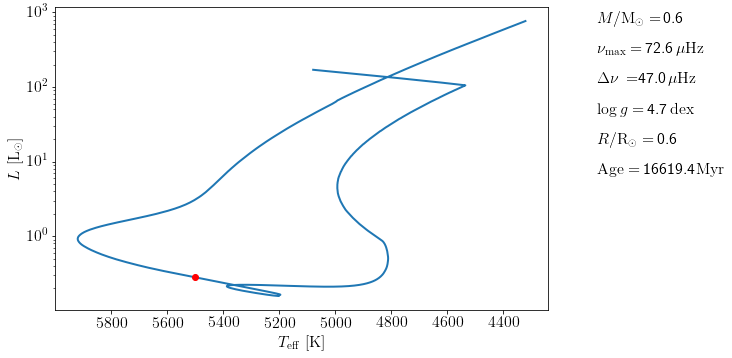

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
ax.semilogy(Teff,L,lw=2)
plt.gca().invert_xaxis()
plt.xlabel(r'$T_\mathrm{eff} \,\, \mathrm{[K]}$',fontsize=16)
plt.ylabel(r'$L \,\, [\mathrm{L_\odot}]$',fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.gcf().subplots_adjust(bottom=0.18)
plt.gcf().subplots_adjust(left=0.18)
plt.gcf().subplots_adjust(right=0.75)

tsize  = 16
M_text = ax.text(1.1, 0.95, r'$M/\mathrm{M}_\odot= \,$'+str(round(M[0],1)), fontsize=tsize, transform=ax.transAxes)
numax_text = ax.text(1.1, 0.85, r'$\nu_\mathrm{max}= \,$'+str(round(numax[0],1))+r"$\,\mu \mathrm{Hz}$", fontsize=tsize, transform=ax.transAxes)
dnu_text = ax.text(1.1, 0.75, r'$\Delta \nu \,=$'+str(round(dnu[0],1))+r"$\,\mu \mathrm{Hz}$", fontsize=tsize, transform=ax.transAxes)
logg_text = ax.text(1.1, 0.65, r'$\log g = \,$'+str(round(logg[0],1))+r"$\,\mathrm{dex}$", fontsize=tsize, transform=ax.transAxes)
R_text = ax.text(1.1, 0.55, r'$R/\mathrm{R}_\odot= \,$'+str(round(R[0],1)), fontsize=tsize, transform=ax.transAxes)
age_text = ax.text(1.1, 0.45, r'$\mathrm{Age} = \,$'+str(round(age[0],1))+r"$\,\mathrm{Myr}$", fontsize=tsize, transform=ax.transAxes)

if not evol.value:
    iage = abs(age-setage.value).argmin()
    ax.semilogy(dct["effective_T"][iage],dct["luminosity"][iage],"ro")
    numax_text.set_text(r'$\nu_\mathrm{max}= \,$'+str(round(numax[iage],1))+r"$\,\mu \mathrm{Hz}$")
    dnu_text.set_text(r'$\Delta \nu \,=$'+str(round(dnu[iage],1))+r"$\,\mu \mathrm{Hz}$")
    logg_text.set_text(r'$\log g = \,$'+str(round(logg[iage],1))+r"$\,\mathrm{dex}$")
    R_text.set_text(r'$R/\mathrm{R}_\odot= \,$'+str(round(R[iage],1)))
    age_text.set_text(r'$\mathrm{Age} = \,$'+str(round(age[iage],1))+r"$\,\mathrm{Myr}$")
else:
    ages = np.linspace(min(age),max(age),200)
    pt, = ax.plot([], [], "ro")
    def init():
        pt.set_data([], [])
        return (pt,)
    def animate(i):
        iage = abs(age-ages[i]).argmin()
        x = Teff[iage]
        y = L[iage]
        pt.set_data(x, y)
        numax_text.set_text(r'$\nu_\mathrm{max}= \,$'+str(round(numax[iage],1))+r"$\,\mu \mathrm{Hz}$")
        dnu_text.set_text(r'$\Delta \nu \,=$'+str(round(dnu[iage],1))+r"$\,\mu \mathrm{Hz}$")
        logg_text.set_text(r'$\log g = \,$'+str(round(logg[iage],1))+r"$\,\mathrm{dex}$")
        R_text.set_text(r'$R/\mathrm{R}_\odot= \,$'+str(round(R[iage],1)))
        age_text.set_text(r'$\mathrm{Age} = \,$'+str(round(age[iage],1))+r"$\,\mathrm{Myr}$")
        return (pt,)    

    anim = ani.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=100, blit=True)
    

    video = anim.to_html5_video()
    html = HTML(video)
    display(html)
    plt.close()

#    anim.save('myAnimation.gif', writer='imagemagick', fps=30)   